# Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Read Dataset

In [3]:
data = pd.read_csv('https://github.com/hilaler/Data-Set-Analysis-Parking-Birmingham-Data-Set/blob/main/dataset.csv?raw=true')
data

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,10/4/2016 7:59
1,BHMBCCMKT01,577,64,10/4/2016 8:25
2,BHMBCCMKT01,577,80,10/4/2016 8:59
3,BHMBCCMKT01,577,107,10/4/2016 9:32
4,BHMBCCMKT01,577,150,10/4/2016 9:59
...,...,...,...,...
35712,Shopping,1920,1517,12/19/2016 14:30
35713,Shopping,1920,1487,12/19/2016 15:03
35714,Shopping,1920,1432,12/19/2016 15:29
35715,Shopping,1920,1321,12/19/2016 16:03


# Data Pre-Processing

In [ ]:
data.describe()

Text(0.5, 1.0, 'Occupancy')

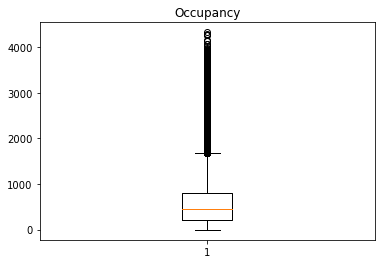

In [5]:
plt.boxplot(data['Occupancy'])
plt.title('Occupancy')

Text(0.5, 1.0, 'Capacity')

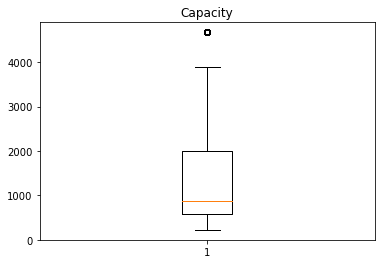

In [25]:
plt.boxplot(data['Capacity'])
plt.title('Capacity')

In [6]:
print('Number of instances before= %d' % (data.shape[0]))
print('Number of attributes before= %d' % (data.shape[1]))

Number of instances before= 35717
Number of attributes before= 4


In [7]:
print((data[data['Occupancy'] > data['Capacity']]))

      SystemCodeNumber  Capacity  Occupancy       LastUpdated
1396       BHMBCCPST01       317        320   10/8/2016 14:03
1613       BHMBCCPST01       317        318  10/22/2016 14:39
3548       BHMBCCSNH01       863        865  11/28/2016 11:01
3549       BHMBCCSNH01       863        866  11/28/2016 11:32
3583       BHMBCCSNH01       863        864  11/30/2016 10:28
...                ...       ...        ...               ...
7542       BHMBRCBRG02      1194       1198  12/18/2016 14:03
12732      BHMMBMMBX01       687        688  12/19/2016 13:03
14796      BHMNCPLDH01       720        723  11/16/2016 11:00
15350      BHMNCPNHS01       500        501   10/4/2016 10:26
15768      BHMNCPNHS01       500        503   11/8/2016 13:00

[373 rows x 4 columns]


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [9]:
data.dropna(inplace = True)
data.drop_duplicates(keep='first',inplace=True)
data = data[data['Occupancy']>=0 ]
data = data[data['Capacity']>=0 ]
false_data = data[data['Occupancy']> data['Capacity']]
data = pd.concat([data, false_data]).drop_duplicates(keep=False)

print('Number of instances before= %d' % (data.shape[0]))
print('Number of attributes before= %d' % (data.shape[1]))

Number of instances before= 35116
Number of attributes before= 4


In [10]:
data.describe()

,Capacity,Occupancy
count,35116.000000,35116.000000
mean,1407.923966,645.350496
std,1183.011879,660.531340
min,220.000000,0.000000
25%,577.000000,210.000000
50%,863.000000,450.000000
75%,2009.000000,799.000000
max,4675.000000,4327.000000


In [11]:
dateTime = data['LastUpdated'].str.split(" ", n = 1, expand = True) 
date = dateTime[0]
time = dateTime[1]
data['Date'] = date
data['Time'] = time
day_name = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data['Day'] = pd.to_datetime(data['Date']).dt.dayofweek.apply(lambda x: day_name[x])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35116 entries, 0 to 35716
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35116 non-null  object
 1   Capacity          35116 non-null  int64 
 2   Occupancy         35116 non-null  int64 
 3   LastUpdated       35116 non-null  object
 4   Date              35116 non-null  object
 5   Time              35116 non-null  object
 6   Day               35116 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [12]:
data['OccupancyRate'] = (100.0*data['Occupancy'])/data['Capacity']

In [13]:
data

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Date,Time,Day,OccupancyRate
0,BHMBCCMKT01,577,61,10/4/2016 7:59,10/4/2016,7:59,Tue,10.571924
1,BHMBCCMKT01,577,64,10/4/2016 8:25,10/4/2016,8:25,Tue,11.091854
2,BHMBCCMKT01,577,80,10/4/2016 8:59,10/4/2016,8:59,Tue,13.864818
3,BHMBCCMKT01,577,107,10/4/2016 9:32,10/4/2016,9:32,Tue,18.544194
4,BHMBCCMKT01,577,150,10/4/2016 9:59,10/4/2016,9:59,Tue,25.996534
...,...,...,...,...,...,...,...,...
35712,Shopping,1920,1517,12/19/2016 14:30,12/19/2016,14:30,Mon,79.010417
35713,Shopping,1920,1487,12/19/2016 15:03,12/19/2016,15:03,Mon,77.447917
35714,Shopping,1920,1432,12/19/2016 15:29,12/19/2016,15:29,Mon,74.583333
35715,Shopping,1920,1321,12/19/2016 16:03,12/19/2016,16:03,Mon,68.802083


# Data Visualization

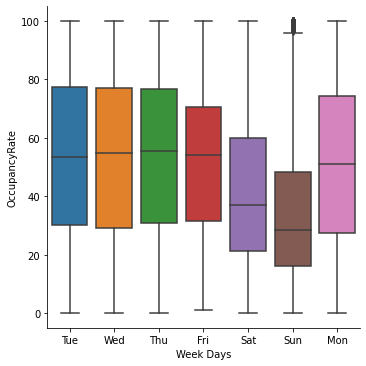

In [14]:
box = sns.catplot(x = "Day",y="OccupancyRate",kind='box',data=data)
box.set(xlabel="Week Days", ylabel = "OccupancyRate")

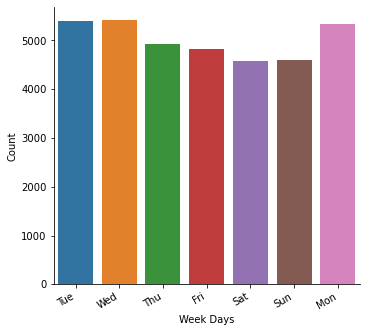

In [15]:
graph = sns.catplot(x='Day', kind='count', data=data)
graph.fig.autofmt_xdate()
graph.set(xlabel="Week Days", ylabel = "Count")

Text(0.5, 1.0, 'Occupancy')

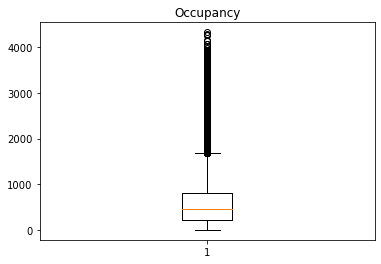

In [16]:
plt.boxplot(data['Occupancy'])
plt.title('Occupancy')

Text(0.5, 1.0, 'Capacity')

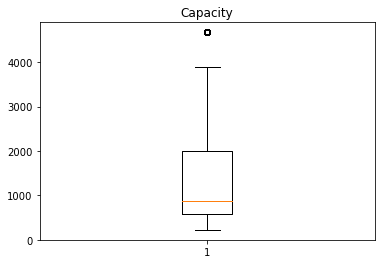

In [17]:
plt.boxplot(data['Capacity'])
plt.title('Capacity')

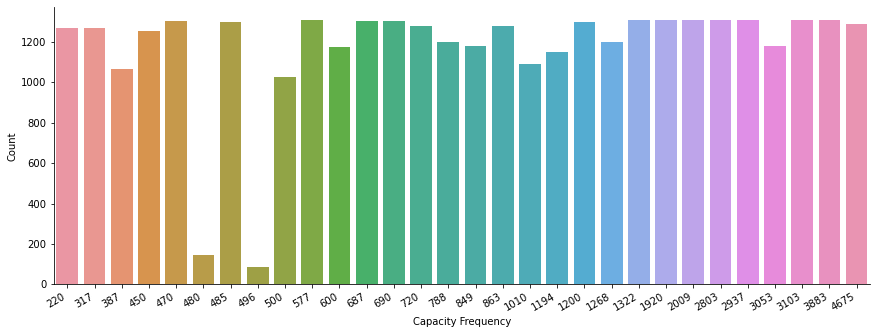

In [18]:
hist = sns.catplot(x='Capacity', kind='count', data=data, aspect=20/8.27)
hist.fig.autofmt_xdate()
hist.set(xlabel="Capacity Frequency", ylabel = "Count")

In [24]:
print(data['Capacity'].value_counts())

577     1307
3103    1307
2937    1307
1322    1307
3883    1307
2803    1307
2009    1307
1920    1307
690     1306
470     1306
687     1306
1200    1301
485     1299
4675    1289
720     1280
863     1278
220     1270
317     1269
450     1253
1268    1199
788     1199
849     1180
3053    1180
600     1174
1194    1150
1010    1093
387     1067
500     1026
480      147
496       88
Name: Capacity, dtype: int64


# Data Sampling

In [20]:
subset = data.sample(n=10000)

In [21]:
subset.shape

(10000, 8)

In [22]:
subset

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Date,Time,Day,OccupancyRate
2550,BHMBCCPST01,317,302,12/17/2016 15:57,12/17/2016,15:57,Sat,95.268139
25554,Others-CCCPS105a,2009,993,10/23/2016 12:26,10/23/2016,12:26,Sun,49.427576
34363,Others-CCCPS98,3103,1701,12/17/2016 14:00,12/17/2016,14:00,Sat,54.817918
31933,Others-CCCPS8,1322,759,10/12/2016 12:04,10/12/2016,12:04,Wed,57.413011
2108,BHMBCCPST01,317,141,11/19/2016 10:04,11/19/2016,10:04,Sat,44.479495
...,...,...,...,...,...,...,...,...
11659,BHMMBMMBX01,687,473,10/16/2016 15:31,10/16/2016,15:31,Sun,68.850073
25223,NIA South,788,97,12/16/2016 9:03,12/16/2016,9:03,Fri,12.309645
23096,NIA Car Parks,1268,615,10/29/2016 14:26,10/29/2016,14:26,Sat,48.501577
31263,Others-CCCPS202,2937,430,11/19/2016 8:57,11/19/2016,8:57,Sat,14.640790


In [23]:
subset.describe()

,Capacity,Occupancy,OccupancyRate
count,10000.000000,10000.000000,10000.000000
mean,1402.419600,645.145400,49.158597
std,1176.876262,662.058463,26.734516
min,220.000000,0.000000,0.000000
25%,577.000000,211.000000,25.792585
50%,863.000000,452.500000,47.003155
75%,2009.000000,790.000000,71.614868
max,4675.000000,3948.000000,100.000000


Text(0.5, 1.0, 'Occupancy')

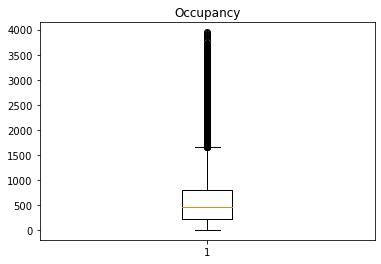

In [28]:
plt.boxplot(subset['Occupancy'])
plt.title('Occupancy')

Text(0.5, 1.0, 'Capacity')

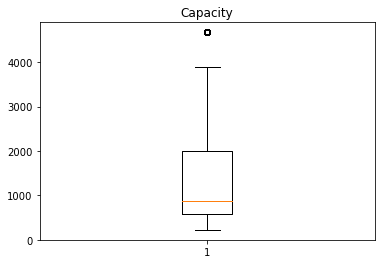

In [31]:
plt.boxplot(subset['Capacity'])
plt.title('Capacity')

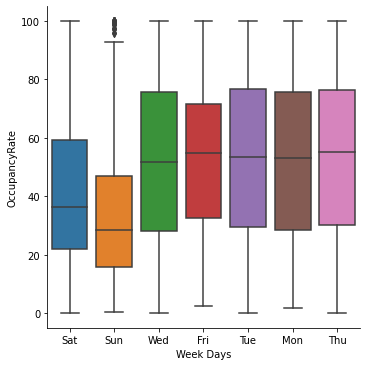

In [29]:
box = sns.catplot(x = "Day",y="OccupancyRate",kind='box',data=subset)
box.set(xlabel="Week Days", ylabel = "OccupancyRate")

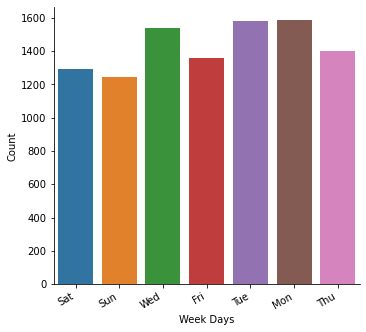

In [30]:
graph = sns.catplot(x='Day', kind='count', data=subset)
graph.fig.autofmt_xdate()
graph.set(xlabel="Week Days", ylabel = "Count")

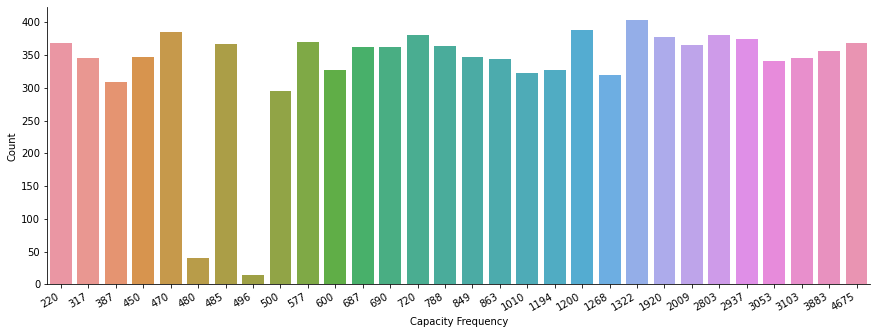

In [32]:
hist = sns.catplot(x='Capacity', kind='count', data=subset, aspect=20/8.27)
hist.fig.autofmt_xdate()
hist.set(xlabel="Capacity Frequency", ylabel = "Count")